#  Unit 2.4b Using Programs with Data, SQL, related to the Trips Table
> Using Programs with Data is focused on SQL and database actions.  Part B focuses on learning SQL commands, connections, and curses using an Imperative programming style,
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)
- What is a database schema?
    - It helps organize and group of data within a database. It defines how the data is organized and how it can be accessed and manipulated by users or applications.
- What is the purpose of identity Column in SQL database?
    - So that there is a unique value for each row inserted into the table. The purpose of an identity column is to provide a unique identifier for each row in the table, which can be useful for differentiating between columns or easily extracting specific data
- What is the purpose of a primary key in SQL database?
    - To have unique input data for reasons of updating, deleting, or checking credentials
    - It helps keep data more private
- What are the Data Types in SQL table?
    - string, boolean, integer, images, list, dictionary, class

### Notes input 
- OOP programming: User class with objects and functions built into it (with attributes)
- Imperative: basic level, functions by function (today)
- schema (in a database): columns of a database, how you describe the database 
    - purpose: differentiate between the columns, easily extract data (organized)
- primary key: should be unique, userid is best (people can share names)
- datatypes in SQL: string, boolean, integer, images, list, dictionary, class

In [15]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('Trips')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()


(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_uid', 'VARCHAR(255)', 1, None, 0)
(3, '_password', 'VARCHAR(255)', 1, None, 0)
(4, '_destination', 'VARCHAR(255)', 1, None, 0)
(5, '_budget', 'VARCHAR(255)', 1, None, 0)
(6, '_dob', 'DATE', 1, None, 0)


### Notes output
- Schema is outputted (id, name, uid...)

## Reading Users table in Sqlite.db
> Uses SQL SELECT statement to read data

- What is a connection object?  After you google it, what do you think it does?
    - An object that represents a connection between an application and a database management system, which sends commands to the database and receives the results.
- Same for cursor object?
    - A cursor is a pointer to data that allows an Embedded SQL program to perform an operation on the record pointed to
    - allows an application to cross over the records or rows returned by a SQL query. It is a way to access the results of a query one row at a time, and to perform operations on each row as it is called.
- Look at conn object and cursor object in VSCode debugger.  What attributes are in the object?
    - execute(sql[, parameters]): Executes an SQL statement
    - fetchone(): Fetches the next row of a query result set.
    - fetchmany([size=cursor.arraysize]): Fetches the next set of rows of a query result set, returning a list of sequences or an empty list if there are no more rows. 
    - fetchall(): Fetches all remaining rows of a query result set, returning a list of sequences or an empty list if there are no rows. close(): Closes the cursor object.
- Is "results" an object?  How do you know?
    - Yes, results is an object because when I debugged, on line 15 the debug window shows the local variables and then the objects. The 3 objects displayed are "conn", "cursor", and "results"


### Notes
- cd _notebooks -> instance -> run "sqlite3 sqlite.db" -> show * from "tablename";
- conn has special variables
- abstraction: code is simplified for user to use 
- init in OOP had CRUD functions like in here (a part of the object)

In [47]:
import sqlite3
database = 'instance/sqlite.db'

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()


(1, 'Thomas Edison', 'tommye', 'lightbulb', 'SeaWorld', '$150000', '1847-02-11')
(2, 'Nikola Tesla', 'ntesla2', 'modelx', 'La Jolla Cove', '$50000', '2023-03-14')
(4, 'Marion Ravenwood', 'ravenrion', 'blackmagic', 'Air and Space Museum', '$725000', '1921-10-21')
(5, 'Joselyn Anda', 'jesa06', '123EllynaOak', 'Hooters', '$50', '2006-12-21')
(7, 'Eli Whitney', 'eliwhi', 'Greenbay4', 'Bahia Resort', '$30750', '2002-06-23')
(8, 'Elly Anda', 'ellyaa', 'ilovefood', 'Home', 'none', '2012-01-19')
(9, 'Athyna', 'athyna7', 'ilovetoplay', 'Coronado Dog Beach', 'none', '2013-04-15')
(10, 'Derryck Anda', 'derrycka', 'f@mily1', 'Philippines', '$25', '1998-11-11')


## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row
-  Compare create() in both SQL lessons.  What is better or worse in the two implementations?
    - In the other lesson using the User class, it prevents duplicates by taking user input of one's id and looks through the database to see if it is already there. It also hashes the password but this one does not.
-  Explain purpose of SQL INSERT.   Is this the same as User __init__?
    - SQL INSERT allows you to insert another user directly by user input
    - It is similar to the User __init__ but the User hashes the password and SQL INSERT does not 

In [26]:
import sqlite3

def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password:")
    destination = input("Enter your desired trip destination:")
    budget = input("Enter your budget:")
    dob = input("Enter your date of birth 'YYYY-MM-DD':")

    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO Trips (_name, _uid, _password, _destination, _budget, _dob) VALUES (?, ?, ?, ?, ?, ?)", (name, uid, password, destination, budget, dob))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
create()

A new user record derrycka has been created


## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?
    - It sets a new password "gothackednewpassword123" if they input a new password that is less than 2 characters long or is too weak.
- Explain try/except, when would except occur?
    - try is the part that actually sets the new password depending on the inputted uid
    - except block catches the error and handles the error so the code can continue to run 
    - try/except is useful when you know that a certain piece of code may cause an error, but you don't want the program to crash when that error occurs
- What code seems to be repeated in each of these examples to point, why is it repeated?
    - try/except is repeated so that the code can continue running even if there is a user input error and to let the user know if/when data is not inputted correctly or not found within the database
    - Connecting to the database seems to be repeated in each of the examples, along with the connect and cursor object. 
    - They are repeated because it helps connect to the database and access that data and manipulate it, depending on the function. 

In [31]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2:
        message = "hacked"
        password = 'gothackednewpassword123'
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE Trips SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
update()


The row with user id derrycka the password has been successfully updated


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.
- Is DELETE a dangerous operation?  Why?
    - Yes because it can delete a whole set of data from the database, but you do have to put in the correct user id for it to go through
    - Maybe multiple verifications would be better to prevent the risk of deleting the wrong data
- In the print statements, what is the "f" and what does {uid} do?
    - f indicates that data from a function is going to be called (userid) within a string
    - {uid} prints our the actual userid from the user input

In [32]:
import sqlite3

def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM Trips WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
delete()

The row with uid grahambalex was successfully deleted


# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.
- Why does the menu repeat?
    - Recursion, menu function is calling itself aas it continues. A function that is the same function it is in. 
- Could you refactor this menu?  Make it work with a List?
    - Yes. You can use a list to simplify the repetitiveness of elifs. You can use a list to store CRUDS


### Notes
- elif is a conditional statement 
- you have to press esc or enter one time for the loop to stop, after you enter your letter

In [41]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'u':
        update()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


(1, 'Thomas Edison', 'tommye', 'lightbulb', 'SeaWorld', '$150000', '1847-02-11')
(2, 'Nikola Tesla', 'ntesla2', 'modelx', 'La Jolla Cove', '$50000', '2023-03-14')
(4, 'Marion Ravenwood', 'ravenrion', 'blackmagic', 'Air and Space Museum', '$725000', '1921-10-21')
(5, 'Joselyn Anda', 'jesa06', '123EllynaOak', 'Hooters', '$50', '2006-12-21')
(7, 'Eli Whitney', 'eliwhi', 'Greenbay4', 'Bahia Resort', '$30750', '2002-06-23')
(8, 'Elly Anda', 'ellyaa', 'ilovefood', 'Home', 'none', '2012-01-19')
(9, 'Athyna', 'athyna7', 'ilovetoplay', 'Coronado Dog Beach', 'none', '2013-04-15')
(10, 'Derryck Anda', 'derrycka', 'f@mily1', 'Philippines', '$25', '1998-11-11')


## Refactored menu using list

In [46]:
def menu():
    operations = [ # crud operations put in a list 
        ('c', create),
        ('r', read),
        ('u', update),
        ('d', delete),
        ('s', schema)
    ]
    while True:
        operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
        if len(operation) == 0: # Escape Key
            return #
        for op in operations:
            if operation.lower() == op[0]: # checks whether the user's input matches the current option being considered in the loop. 
                op[1]()
                break
        else:
            print("Enter c, r, u, d, or s") # if no match, print prompt 
        
menu()

(1, 'Thomas Edison', 'tommye', 'lightbulb', 'SeaWorld', '$150000', '1847-02-11')
(2, 'Nikola Tesla', 'ntesla2', 'modelx', 'La Jolla Cove', '$50000', '2023-03-14')
(4, 'Marion Ravenwood', 'ravenrion', 'blackmagic', 'Air and Space Museum', '$725000', '1921-10-21')
(5, 'Joselyn Anda', 'jesa06', '123EllynaOak', 'Hooters', '$50', '2006-12-21')
(7, 'Eli Whitney', 'eliwhi', 'Greenbay4', 'Bahia Resort', '$30750', '2002-06-23')
(8, 'Elly Anda', 'ellyaa', 'ilovefood', 'Home', 'none', '2012-01-19')
(9, 'Athyna', 'athyna7', 'ilovetoplay', 'Coronado Dog Beach', 'none', '2013-04-15')
(10, 'Derryck Anda', 'derrycka', 'f@mily1', 'Philippines', '$25', '1998-11-11')


## Trips data printed out in a table

In [35]:
import sqlite3
from tabulate import tabulate

# Connect to the SQLite database
conn = sqlite3.connect('instance/sqlite.db')
cursor = conn.cursor()

# Select all rows from the "Trips" table
cursor.execute("SELECT id, _name, _uid, _password, _destination, _budget, _dob FROM Trips")
rows = cursor.fetchall()

# Use tabulate to format the rows as a table
table = tabulate(rows, headers=["ID #", "Name", "UID", "Password", "Destination", "Budget", "Date of Birth"])

# Print the table
print(table)

  ID #  Name              UID        Password      Destination           Budget    Date of Birth
------  ----------------  ---------  ------------  --------------------  --------  ---------------
     1  Thomas Edison     tommye     lightbulb     SeaWorld              $150000   1847-02-11
     2  Nikola Tesla      ntesla2    modelx        La Jolla Cove         $50000    2023-03-14
     4  Marion Ravenwood  ravenrion  blackmagic    Air and Space Museum  $725000   1921-10-21
     5  Joselyn Anda      jesa06     123EllynaOak  Hooters               $50       2006-12-21
     7  Eli Whitney       eliwhi     Greenbay4     Bahia Resort          $30750    2002-06-23
     8  Elly Anda         ellyaa     ilovefood     Home                  none      2012-01-19
     9  Athyna            athyna7    ilovetoplay   Coronado Dog Beach    none      2013-04-15
    10  Derryck Anda      derrycka   f@mily1       Philippines           $25       1998-11-11


# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- In this implementation, do you see procedural abstraction?
    - Yes. In refactoring the menu I rewrote the code without a bunch of elifs, by placing the CRUD operations in a list and then referring to the list to do the certain function.
- In 2.4a or 2.4b lecture
    - Do you see data abstraction?  Complement this with Debugging example. (debugging below)
        - Yes. In refactoring the menu I rewrote the code without a bunch of elifs, by placing the CRUD operations in a list and then referring to the list to do the certain function.
    - Use Imperative or OOP style to Create a new Table or do something that applies to your CPT project.
        - Created the Trips table related to my CPT project

Reference... [sqlite documentation](https://www.sqlitetutorial.net/sqlite-python/creating-tables/)


## Debugging


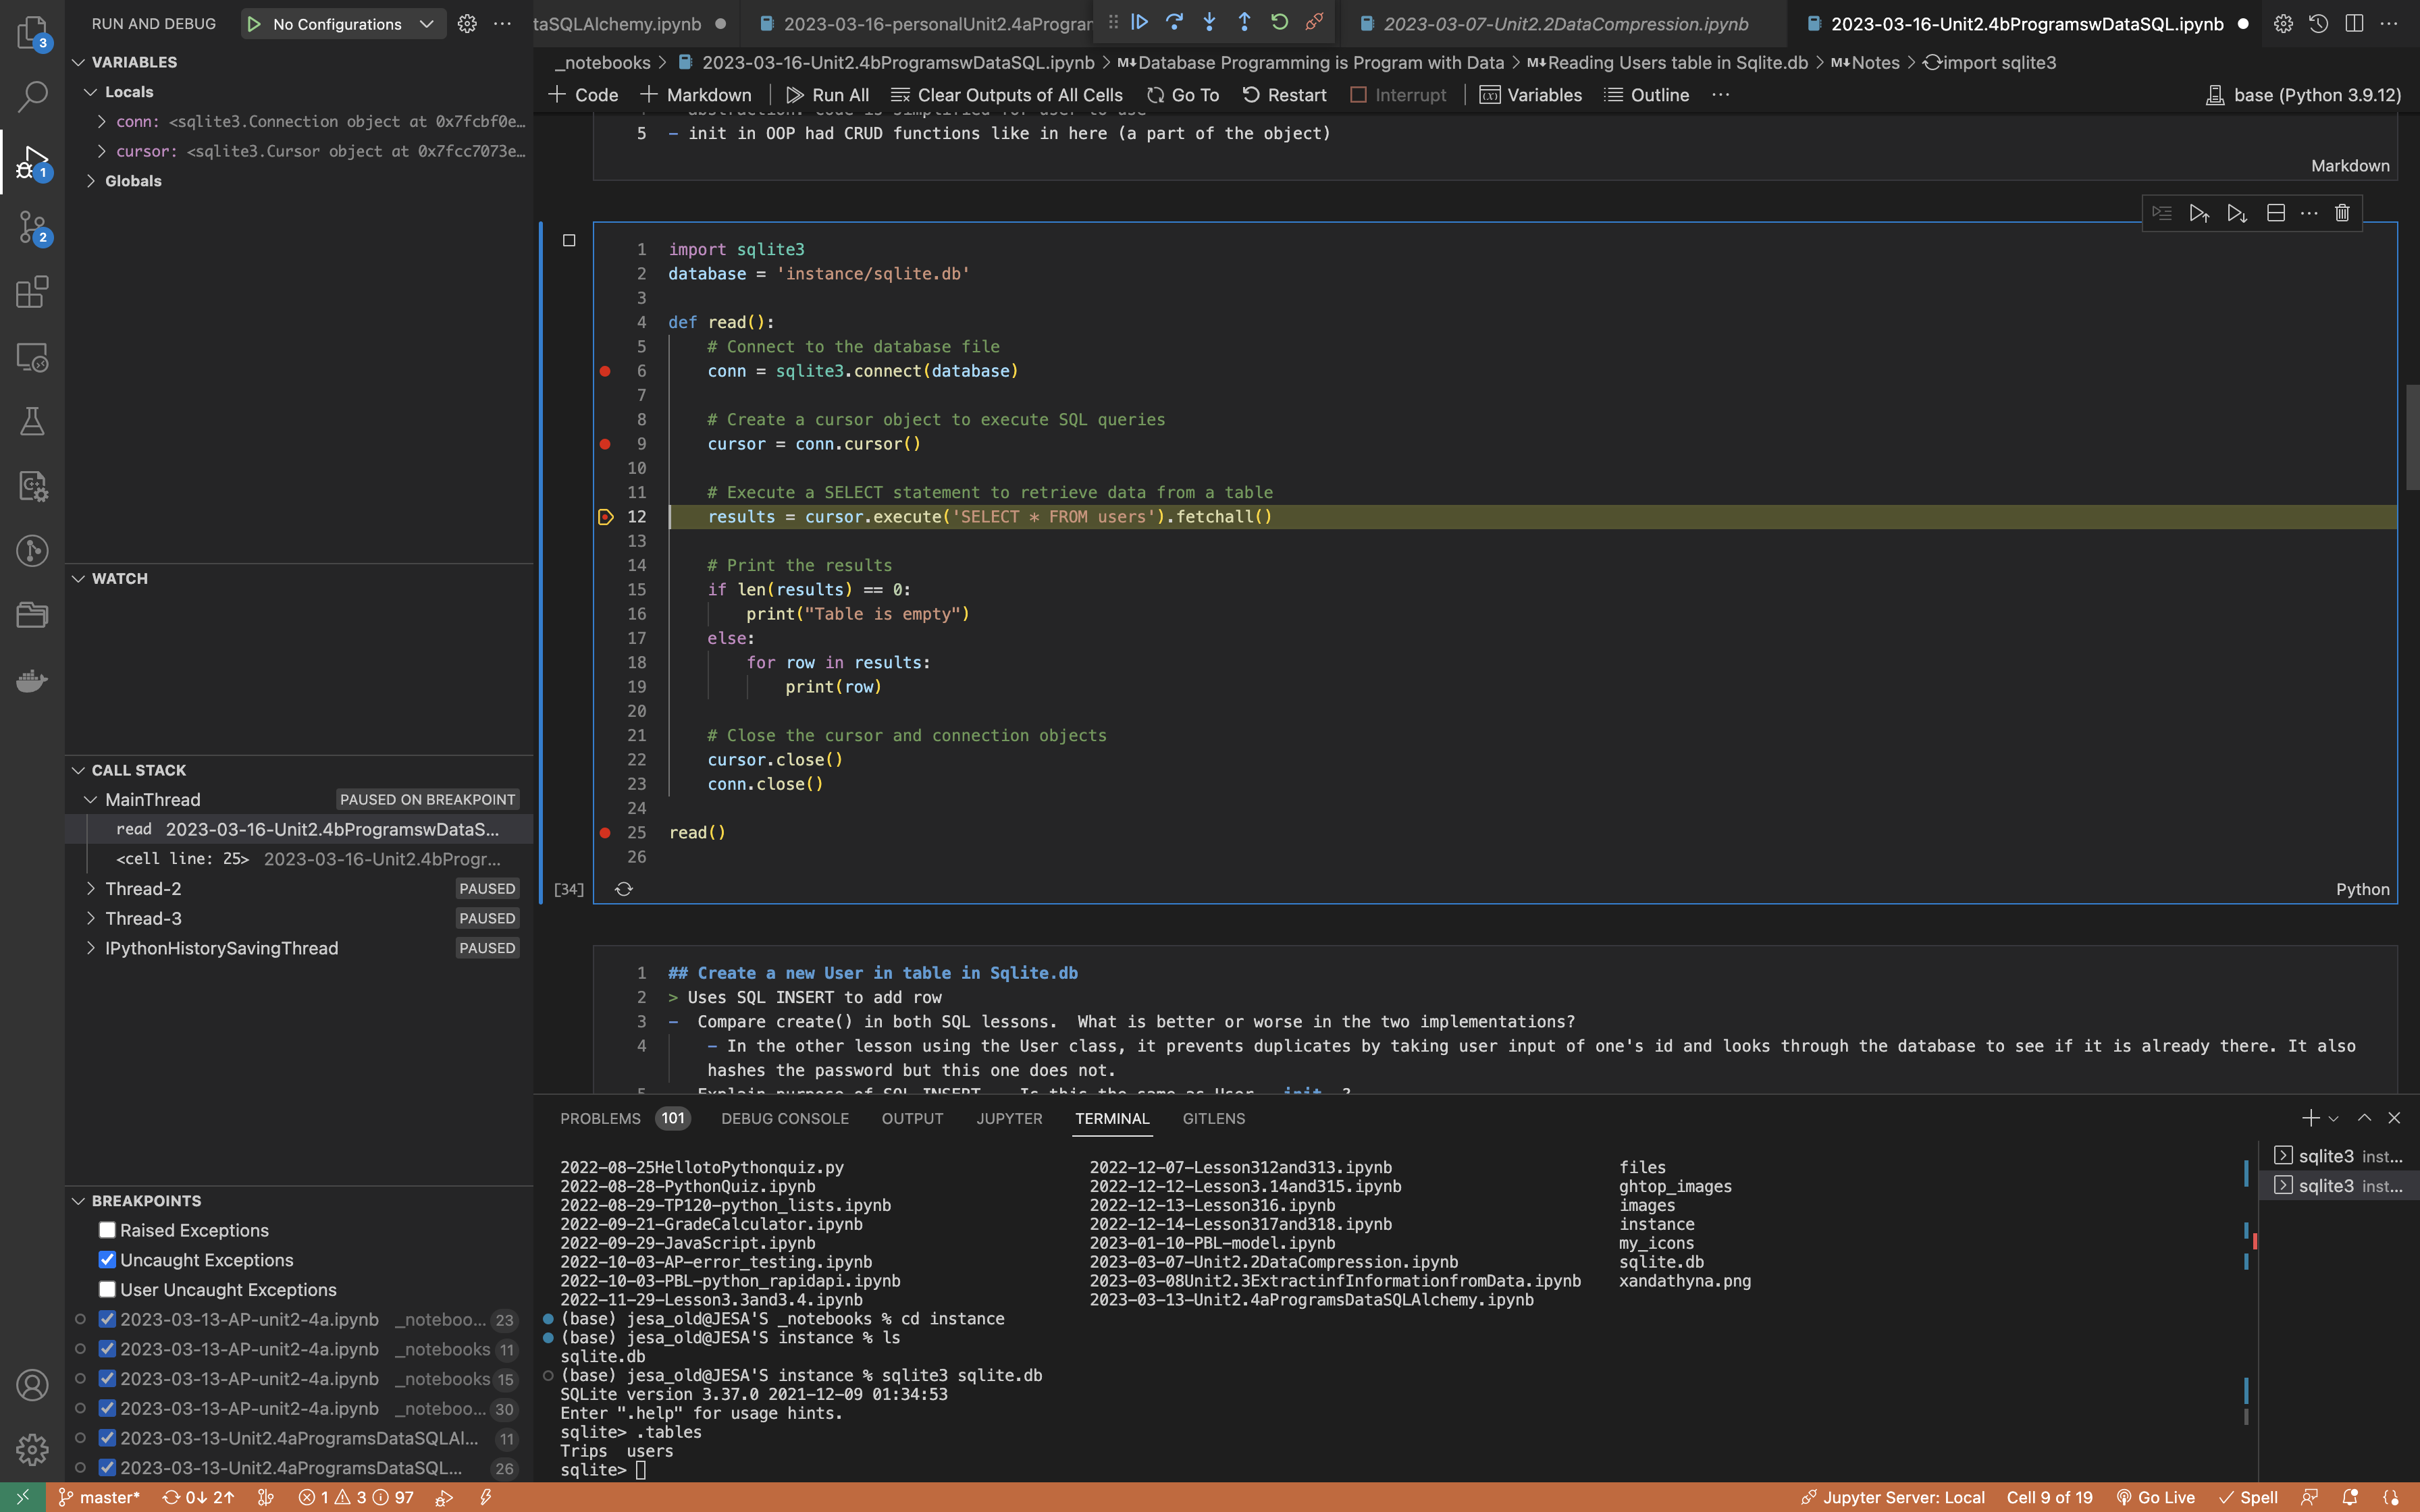

In [9]:
from IPython.display import Image, display
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "My laptop", 'label': "Debugging Read Function", 'file': "debug2.4b.png"}
            ]
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))


# Run this as standalone tester to see sample data printed in Jupyter terminal
if __name__ == "__main__":

    
    # display default images from image_data()
    default_images = image_data()
    image_display(default_images)